In [238]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Data upload

### Activities

In [452]:
acdt = pd.read_csv('activities_junction_cut.csv')
acdt.describe()

,order,created_by,updated_by,category,points,customers,completions,earned,criteria.0.threshold
count,11.0,1.100000e+01,1.100000e+01,0.0,11.000000,11.000000,11.000000,1.100000e+01,11.000000
mean,100.0,9.091212e+07,1.000011e+08,NaN,31.818182,66183.454545,66299.363636,4.755629e+06,1.272727
std,0.0,3.014408e+07,3.060459e+02,NaN,51.345532,168990.968054,168968.867364,1.002970e+07,0.646670
min,100.0,2.430300e+04,1.000006e+08,NaN,0.000000,1.000000,1.000000,0.000000e+00,1.000000
25%,100.0,1.000001e+08,1.000009e+08,NaN,0.000000,344.000000,344.000000,1.000000e+00,1.000000
50%,100.0,1.000012e+08,1.000012e+08,NaN,0.000000,2911.000000,2911.000000,5.500000e+01,1.000000
75%,100.0,1.000012e+08,1.000012e+08,NaN,50.000000,20447.500000,20932.000000,1.425050e+06,1.000000
max,100.0,1.000012e+08,1.000013e+08,NaN,150.000000,565921.000000,565922.000000,2.843335e+07,3.000000


In [453]:
acdt.shape

(11, 26)

### Events

In [46]:
evdt = pd.read_csv("events_junction.csv", low_memory = False)

In [78]:
evdt.shape

(7932877, 60)

In [134]:
evdt.drop(columns = ['properties.points_burned', 
                     'properties.country', 
                     'properties.coupon_code', 
                     'properties.gift_card', 
                     'properties.level', 
                     'properties.last_name', 
                     'properties.birth_date', 
                     'properties.giftcard_code', 
                     'properties.source', 
                     'properties.first_name', 
                     'properties.uk_size', 
                     'properties.code', 
                     'properties.height', 
                     'properties.handler', 
                     'properties.email', 
                     'properties.website',
                     'properties.special_price',
                     'properties.magento_website_id'], inplace = True)

In [137]:
evdt.head()

,_id,timestamp,unix_timestamp,date,customer,action,points,properties.transaction_id,properties.total,properties.currency,properties.discount,properties.shipping,properties.gift_card_amount,properties.billing_country,properties.store_credit_amount,properties.bonus_points,expdate,expired,used_points,properties.quantity,properties.referred,properties.reward,properties.subtotal,properties.customer,properties.product_category,properties.purchase_total,properties.personal_style,properties.transfer_to,properties.points_rewarded,properties.price,properties.shoe_size,properties.activity,properties.gender,properties.points,properties.giftcard_id,properties.marketing_optin,properties.occupation,properties.has_kid,properties.purchase_count,properties.on_sale,properties.giftcard_expires_at,properties.product_id
0,5eddd4b0bc4bfd67cf8b58b9,2020-06-08T06:03:28.502Z,1591596208,2020-06-08T00:00:00.000Z,3104,checkout,358,LBSG002949868,357.94,SGD,-63.16,0.0,0.0,SG,NaN,NaN,2021-06-30T00:00:00.000Z,True,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5eddd4c6bf4bfdbecc8b5a60,2020-06-08T06:03:50.604Z,1591596230,2020-06-08T00:00:00.000Z,70175,checkout,40,LBSG002949862,39.90,SGD,0.00,0.0,0.0,SG,NaN,NaN,2021-12-31T00:00:00.000Z,True,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5eddd4f2bf4bfdbecc8b5b47,2020-06-08T06:04:34.945Z,1591596274,2020-06-08T00:00:00.000Z,65947,checkout,111,LBSG002949871,110.24,SGD,-19.46,0.0,0.0,SG,NaN,NaN,2021-06-30T00:00:00.000Z,True,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5eddd4fbbf4bfdbecc8b5b7a,2020-06-08T06:04:43.360Z,1591596283,2020-06-08T00:00:00.000Z,304754,checkout,47,LBSG002949874,46.90,SGD,0.00,0.0,0.0,SG,NaN,NaN,2021-06-30T00:00:00.000Z,True,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5eddd50ebc4bfd97cf8b5c99,2020-06-08T06:05:02.712Z,1591596302,2020-06-08T00:00:00.000Z,1878,checkout,148,LBSG002949877,147.40,SGD,-20.10,0.0,0.0,SG,NaN,NaN,2021-06-30T00:00:00.000Z,True,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
evdt[(evdt.action == 'opt_out')]['customer'].unique()

array(['opted_out_1595233329:6cc2a46dca24bba1a92587bf60dd42feb1373700',
       'opted_out_1595233330:317477465a3517af8a3f236801e0b5782035e26a',
       'opted_out_1595233331:fba95093acc5830514339ff1f40fdbd96f70d085',
       'opted_out_1595233332:b1c67a5f8ce830923ae453997e3ae44fdd0e6eb2',
       'opted_out_1595233334:f67599a7745ac18703fe625ac41e51d51665e743',
       'opted_out_1595233335:ba23dad4b471f7720db387d68c4dda98adb557a4',
       'opted_out_1595233336:96bd696ec0aa652f7b6100fc67c8a162e0318ba4',
       'opted_out_1595233337:efc63c160ed9bed4e42fe0452732d4740aa1a96a',
       'opted_out_1595233338:561be87a5d547c1878b11a467797d3f2bc8a0bb4',
       'opted_out_1595233339:a5ec4259532ef664428b0c35c8e82807cfaf557f',
       'opted_out_1595233340:db1218dd8d58f8df335c04c2874aaef1788d83a3',
       'opted_out_1595233341:18031626034a4afe9fcaf28442aa3d83a3de73c4',
       'opted_out_1595233342:48854821fe8949858e840b28953814542c5d5736',
       'opted_out_1595233344:8c74ab3f04a9616869c07cdcebab30536c4

In [100]:
evdt['action'].value_counts()

checkout_item        2599119
checkout             1136809
points_expired        778459
activity              732332
level_up              665356
opt_in                597503
reward                569874
profile               532281
coupon_redeem         208398
point_add              30244
profile_completed      29408
level_down             16608
campaign_bonus         10748
point_sub               5835
level_set               4891
program_transfer        4312
referral                2965
refund                  2823
referral_points         2039
referral_bonus          1484
daily_login              539
opt_out                  465
point_spend              275
coupon_unassign           71
coupon_invalidate         19
merge                     14
point_fix                  6
Name: action, dtype: int64

In [117]:
evdt['properties.activity'].value_counts()

5e58ccd22cf1905a748b463e    565086
5ea68d90b377830a00000070    114680
5e81c0432aaf8181a700000b     28695
5f8417903f4cfd120c8b458f     13325
62440b123d9f9884723b8aa5      5134
624409683f7d41816127e659      3313
6242aa6a2905fe804038a9bc      1404
6242d76edebd8b77890fb4e2       603
6242aa0bdebd8b2ee87c3631        85
624409cc3f7d41816127e65f         6
62440ac160ace45d990760bd         1
Name: properties.activity, dtype: int64

In [82]:
evdt['customer'].unique().shape # multiple events for same customers

(598661,)

## Data viz

#### Customers who opt out

In [223]:
# making opt-out-customer-only dataset
oo_list = evdt[(evdt.action == 'opt_out')]['customer'].to_list()
oo_list

['opted_out_1595233329:6cc2a46dca24bba1a92587bf60dd42feb1373700',
 'opted_out_1595233330:317477465a3517af8a3f236801e0b5782035e26a',
 'opted_out_1595233331:fba95093acc5830514339ff1f40fdbd96f70d085',
 'opted_out_1595233332:b1c67a5f8ce830923ae453997e3ae44fdd0e6eb2',
 'opted_out_1595233334:f67599a7745ac18703fe625ac41e51d51665e743',
 'opted_out_1595233335:ba23dad4b471f7720db387d68c4dda98adb557a4',
 'opted_out_1595233336:96bd696ec0aa652f7b6100fc67c8a162e0318ba4',
 'opted_out_1595233337:efc63c160ed9bed4e42fe0452732d4740aa1a96a',
 'opted_out_1595233338:561be87a5d547c1878b11a467797d3f2bc8a0bb4',
 'opted_out_1595233339:a5ec4259532ef664428b0c35c8e82807cfaf557f',
 'opted_out_1595233340:db1218dd8d58f8df335c04c2874aaef1788d83a3',
 'opted_out_1595233341:18031626034a4afe9fcaf28442aa3d83a3de73c4',
 'opted_out_1595233342:48854821fe8949858e840b28953814542c5d5736',
 'opted_out_1595233344:8c74ab3f04a9616869c07cdcebab30536c473eb0',
 'opted_out_1595233345:ff928232983f14781fbfc06bfb59b172e53b65dd',
 'opted_ou

In [251]:
oo_dt = evdt[(evdt.customer.isin(oo_list))]
oo_dt.shape
oo_dt.to_csv('opt-out_customer_history.csv', index = False)

In [230]:
oon = oo_dt['customer'].unique().shape[0]  # n unique customers who opted out

In [167]:
oo_dt.head()

,_id,timestamp,unix_timestamp,date,customer,action,points,properties.transaction_id,properties.total,properties.currency,properties.discount,properties.shipping,properties.gift_card_amount,properties.billing_country,properties.store_credit_amount,properties.bonus_points,expdate,expired,used_points,properties.quantity,properties.referred,properties.reward,properties.subtotal,properties.customer,properties.product_category,properties.purchase_total,properties.personal_style,properties.transfer_to,properties.points_rewarded,properties.price,properties.shoe_size,properties.activity,properties.gender,properties.points,properties.giftcard_id,properties.marketing_optin,properties.occupation,properties.has_kid,properties.purchase_count,properties.on_sale,properties.giftcard_expires_at,properties.product_id
312,5ede46e9bd4bfd6f558b456c,2020-06-08T14:10:49.946Z,1591625449,2020-06-08T00:00:00.000Z,opted_out_1598722664:142d64be24a2efe2c37f56177...,checkout,500,TR-TEST001,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,5ede4842bf4bfdc8528b456c,2020-06-08T14:16:34.281Z,1591625794,2020-06-08T00:00:00.000Z,opted_out_1598722664:142d64be24a2efe2c37f56177...,checkout,700,TR-TESTBD03,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,5ede4a91bc4bfdd4588b456c,2020-06-08T14:26:25.115Z,1591626385,2020-06-08T00:00:00.000Z,opted_out_1598722641:d8d064b85370985866897e046...,checkout,501,TR-TESBTD001,501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,5ede5a05be4bfde1698b456c,2020-06-08T15:32:21.501Z,1591630341,2020-06-08T00:00:00.000Z,opted_out_1598722706:adae0d962084d1b45c6ecb189...,checkout,701,TR-LTEST002231,701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,5ede5a30be4bfd146a8b456c,2020-06-08T15:33:04.395Z,1591630384,2020-06-08T00:00:00.000Z,opted_out_1598722706:adae0d962084d1b45c6ecb189...,checkout,500,TR-TESTPASSJ03,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
action_log = pd.get_dummies(oo_dt['action']) # no NAs in column
action_log.shape

(3606, 21)

In [177]:
action_log.head()

,activity,campaign_bonus,checkout,checkout_item,coupon_redeem,daily_login,level_down,level_set,level_up,opt_in,opt_out,point_add,point_sub,points_expired,profile,profile_completed,program_transfer,referral,referral_points,refund,reward
312,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
315,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
323,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
362,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [206]:
col_nor = action_log.columns.tolist() 
col_ord = ['opt_in','profile','profile_completed'] + col_nor[:9] + col_nor[11:14] + col_nor[16:] + ['opt_out']
action_log_ord = action_log[col_ord]
action_log_ord.head()

,opt_in,profile,profile_completed,activity,campaign_bonus,checkout,checkout_item,coupon_redeem,daily_login,level_down,level_set,level_up,point_add,point_sub,points_expired,program_transfer,referral,referral_points,refund,reward,opt_out
312,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
315,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
362,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [179]:
oo_ext = pd.concat([oo_dt, action_log], axis = 1)
oo_ext.head()

,_id,timestamp,unix_timestamp,date,customer,action,points,properties.transaction_id,properties.total,properties.currency,properties.discount,properties.shipping,properties.gift_card_amount,properties.billing_country,properties.store_credit_amount,properties.bonus_points,expdate,expired,used_points,properties.quantity,properties.referred,properties.reward,properties.subtotal,properties.customer,properties.product_category,properties.purchase_total,properties.personal_style,properties.transfer_to,properties.points_rewarded,properties.price,properties.shoe_size,properties.activity,properties.gender,properties.points,properties.giftcard_id,properties.marketing_optin,properties.occupation,properties.has_kid,properties.purchase_count,properties.on_sale,properties.giftcard_expires_at,properties.product_id,activity,campaign_bonus,checkout,checkout_item,coupon_redeem,daily_login,level_down,level_set,level_up,opt_in,opt_out,point_add,point_sub,points_expired,profile,profile_completed,program_transfer,referral,referral_points,refund,reward
312,5ede46e9bd4bfd6f558b456c,2020-06-08T14:10:49.946Z,1591625449,2020-06-08T00:00:00.000Z,opted_out_1598722664:142d64be24a2efe2c37f56177...,checkout,500,TR-TEST001,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
315,5ede4842bf4bfdc8528b456c,2020-06-08T14:16:34.281Z,1591625794,2020-06-08T00:00:00.000Z,opted_out_1598722664:142d64be24a2efe2c37f56177...,checkout,700,TR-TESTBD03,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
323,5ede4a91bc4bfdd4588b456c,2020-06-08T14:26:25.115Z,1591626385,2020-06-08T00:00:00.000Z,opted_out_1598722641:d8d064b85370985866897e046...,checkout,501,TR-TESBTD001,501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,501.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
361,5ede5a05be4bfde1698b456c,2020-06-08T15:32:21.501Z,1591630341,2020-06-08T00:00:00.000Z,opted_out_1598722706:adae0d962084d1b45c6ecb189...,checkout,701,TR-LTEST002231,701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
362,5ede5a30be4bfd146a8b456c,2020-06-08T15:33:04.395Z,1591630384,2020-06-08T00:00:00.000Z,opted_out_1598722706:adae0d962084d1b45c6ecb189...,checkout,500,TR-TESTPASSJ03,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-30T00:00:00.000Z,True,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [234]:
action_log_tot = np.reshape(action_log_ord.sum(axis = 0).to_numpy(), (21,1))/oon
action_log_tot.shape

(21, 1)

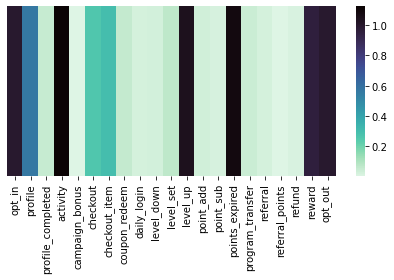

In [253]:
sns.heatmap(action_log_tot.transpose(), cmap = 'mako_r', yticklabels = "", xticklabels = col_ord, annot = True)
plt.tight_layout()
#plt.savefig('opt-out_customer_journey.pdf', dpi=300)

In [325]:
oo_by_cust = pd.read_csv("opt_out_by_customer.csv", index_col = 0)
oo_by_cust = oo_by_cust[(oo_by_cust.last_action != 'opt_out') & (oo_by_cust.last_action != 'level_up')]
oo_by_cust.head()

,id,last_action,days
0,opted_out_1598722664:142d64be24a2efe2c37f56177...,reward,69.069063
1,opted_out_1598722641:d8d064b85370985866897e046...,reward,82.132373
2,opted_out_1598722706:adae0d962084d1b45c6ecb189...,reward,69.069537
3,opted_out_1598722628:8c1764c2d041ab5cb8ded7dff...,profile,3.154734
5,opted_out_1595233145:967b0ac6cb86ae4a0be788dfd...,checkout_item,37.688889


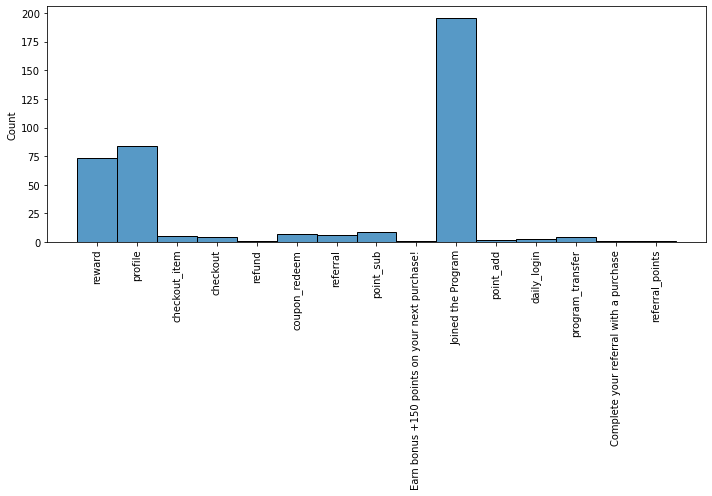

In [334]:
plt.figure(figsize = (10,7))
sns.histplot(oo_by_cust, x = 'last_action').set(xlabel='')
plt.xticks(rotation=90);
plt.tight_layout()
#plt.savefig('opt-out_last_actions.png', dpi=300)

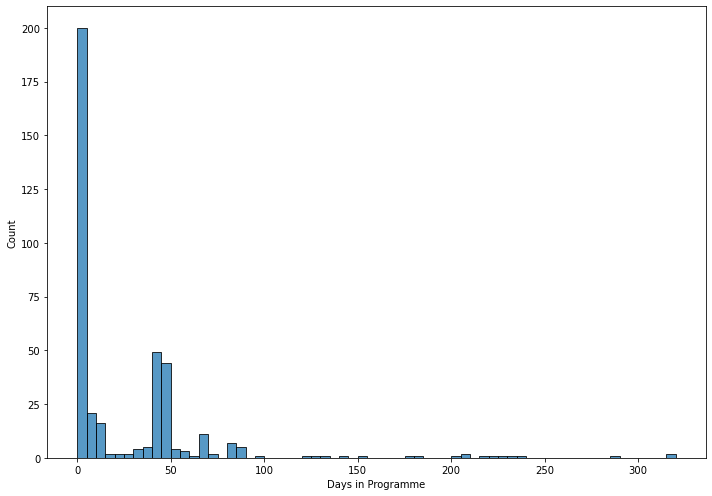

In [330]:
plt.figure(figsize = (10,7))
sns.histplot(oo_by_cust, x = 'days', binwidth = 5).set(xlabel='Days in Programme')
plt.tight_layout()
plt.savefig('opt-out_time_in_programme.png', dpi=300)

#### Customers who do NOT opt out

In [272]:
no_oo_dt = evdt[(~evdt['customer'].isin(oo_list))]
no_oo_dt.to_csv('not_opt_out_customer_history.csv', index = False)

In [336]:
no_oo_dt.head()

,_id,timestamp,unix_timestamp,date,customer,action,points,properties.transaction_id,properties.total,properties.currency,properties.discount,properties.shipping,properties.gift_card_amount,properties.billing_country,properties.store_credit_amount,properties.bonus_points,expdate,expired,used_points,properties.quantity,properties.referred,properties.reward,properties.subtotal,properties.customer,properties.product_category,properties.purchase_total,properties.personal_style,properties.transfer_to,properties.points_rewarded,properties.price,properties.shoe_size,properties.activity,properties.gender,properties.points,properties.giftcard_id,properties.marketing_optin,properties.occupation,properties.has_kid,properties.purchase_count,properties.on_sale,properties.giftcard_expires_at,properties.product_id
0,5eddd4b0bc4bfd67cf8b58b9,2020-06-08T06:03:28.502Z,1591596208,2020-06-08T00:00:00.000Z,3104,checkout,358,LBSG002949868,357.94,SGD,-63.16,0.0,0.0,SG,NaN,NaN,2021-06-30T00:00:00.000Z,True,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5eddd4c6bf4bfdbecc8b5a60,2020-06-08T06:03:50.604Z,1591596230,2020-06-08T00:00:00.000Z,70175,checkout,40,LBSG002949862,39.90,SGD,0.00,0.0,0.0,SG,NaN,NaN,2021-12-31T00:00:00.000Z,True,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5eddd4f2bf4bfdbecc8b5b47,2020-06-08T06:04:34.945Z,1591596274,2020-06-08T00:00:00.000Z,65947,checkout,111,LBSG002949871,110.24,SGD,-19.46,0.0,0.0,SG,NaN,NaN,2021-06-30T00:00:00.000Z,True,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5eddd4fbbf4bfdbecc8b5b7a,2020-06-08T06:04:43.360Z,1591596283,2020-06-08T00:00:00.000Z,304754,checkout,47,LBSG002949874,46.90,SGD,0.00,0.0,0.0,SG,NaN,NaN,2021-06-30T00:00:00.000Z,True,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5eddd50ebc4bfd97cf8b5c99,2020-06-08T06:05:02.712Z,1591596302,2020-06-08T00:00:00.000Z,1878,checkout,148,LBSG002949877,147.40,SGD,-20.10,0.0,0.0,SG,NaN,NaN,2021-06-30T00:00:00.000Z,True,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
action_log_no = pd.get_dummies(no_oo_dt['action'])
len(action_log_no.columns)

26

In [358]:
no_ext = pd.concat([no_oo_dt, action_log_no], axis = 1)

In [360]:
col_ord2 = ['opt_in','profile','profile_completed'] + col_nor[:9] + col_nor[11:14] + col_nor[16:]
action_log_no_ord = action_log_no[col_ord2]
action_log_no_ord.head()

,opt_in,profile,profile_completed,activity,campaign_bonus,checkout,checkout_item,coupon_redeem,daily_login,level_down,level_set,level_up,point_add,point_sub,points_expired,program_transfer,referral,referral_points,refund,reward
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [371]:
non = no_oo_dt['customer'].unique().shape[0]
action_log_no_tot = np.reshape(action_log_no_ord.sum(axis = 0).to_numpy(), (20,1))/non
action_log_no_tot.shape

(20, 1)

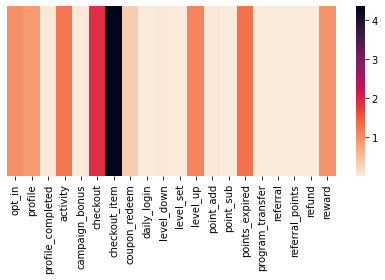

In [375]:
sns.heatmap(action_log_no_tot.transpose(), cmap = 'rocket_r', yticklabels = "", xticklabels = col_ord2)
plt.tight_layout()